In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
#import functions as fun

In [15]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .01
mpl.rcParams['figure.subplot.top']    = .9
mpl.rcParams['figure.subplot.left']   = .05
mpl.rcParams['figure.subplot.right']  = .95
mpl.rcParams['figure.subplot.wspace'] = .02
mpl.rcParams['figure.subplot.hspace'] = .0
mpl.rcParams['figure.figsize']        = 7,3


cols = {}
cols['ocean'] = '.7'
cols['land'] = '.9'

In [4]:
with xr.open_dataset(f'../data/sig_process.nc') as ds:
    lon  = ds['lon'].values
    lat  = ds['lat'].values
    glac = ds['glac'].values
    gsmb = ds['gsmb'].values
    gdyn = ds['gdyn'].values
    asmb = ds['asmb'].values
    adyn = ds['adyn'].values
    lws  = ds['lws'].values
    gia  = ds['gia'].values

In [5]:
def makeglobal(ax):
    ax.set_global()
    ax.add_feature(cfeature.LAND,color=cols['land'])
    ax.add_feature(cfeature.OCEAN,color=cols['ocean'])
    ax.outline_patch.set_visible(False)

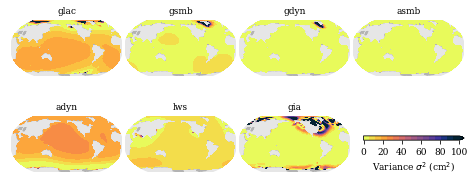

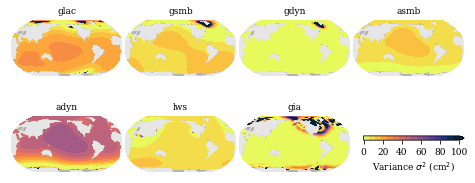

In [17]:
cmap = plt.get_cmap('cmo.thermal_r',16)
vmax = 100

for s,scen in enumerate(['rcp45','rcp85']):

    fig = plt.figure()
    
    ax = fig.add_subplot(2,4,1,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,glac[s,:,:]**2,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('glac')
    makeglobal(ax)
    
    ax = fig.add_subplot(2,4,2,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,gsmb[s,:,:]**2,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('gsmb')
    makeglobal(ax)
    
    ax = fig.add_subplot(2,4,3,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,gdyn[s,:,:]**2,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('gdyn')
    makeglobal(ax)
    
    ax = fig.add_subplot(2,4,4,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,asmb[s,:,:]**2,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('asmb')
    makeglobal(ax)
    
    ax = fig.add_subplot(2,4,5,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,adyn[s,:,:]**2,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('adyn')
    makeglobal(ax)
    
    ax = fig.add_subplot(2,4,6,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,lws[s,:,:]**2,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('lws')
    makeglobal(ax)
    
    ax = fig.add_subplot(2,4,7,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,gia[s,:,:]**2,transform=ccrs.PlateCarree(),vmin=0,vmax=vmax,cmap=cmap)
    ax.set_title('gia')
    makeglobal(ax)
    
    cax = fig.add_axes([.75,.25,.2,.02])
    cb = plt.colorbar(im,cax=cax,extend='max',orientation='horizontal')
    cb.set_label('Variance $\sigma^2$ (cm$^2$)')
    
    figname = f'draftplot_process_components_{scen}.png'

    plt.savefig(f'../figures/{figname}',dpi=600)
    plt.savefig(f'../../../writing/codependence/figures/{figname}',dpi=600)
    plt.show()
    plt.close()